In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into pandas dataframe

data_url = "https://raw.githubusercontent.com/nishilp/Datascience05/master/data/Historical%20Product%20Demand.csv"
raw_data = pd.read_csv(data_url)

In [3]:
# Check total number of rows and columns. This frame has 5320 rows and 14 columns

raw_data.shape

(1048575, 5)

In [4]:
# Check rows with missing attribute values

raw_data.isnull().sum(axis=0)

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [5]:
# Dropping rows with null date values 

intrim_data = raw_data.dropna()

In [6]:
intrim_data.shape

(1037336, 5)

In [7]:
intrim_data.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [9]:
# Since we are predicting data for just one product (Product_0011), we will filter out rest of the products

intrim_data = intrim_data.loc[intrim_data['Product_Code'] == 'Product_0011']

In [10]:
intrim_data.shape

(1936, 5)

In [11]:
# At this point its safe to convert Product_Code, Warehouse, Product_Category using LabelEncoder

from sklearn import preprocessing
# Create a label (category) encoder object

pcode = preprocessing.LabelEncoder()
whouse = preprocessing.LabelEncoder()
pcategory = preprocessing.LabelEncoder()

# Apply the fitted encoder to the pandas column

intrim_data['Product_Code'] = pcode.fit_transform(intrim_data['Product_Code'])
intrim_data['Warehouse'] = whouse.fit_transform(intrim_data['Warehouse']) 
intrim_data['Product_Category'] = pcategory.fit_transform(intrim_data['Product_Category'])

In [12]:
intrim_data.dtypes

Product_Code         int64
Warehouse            int64
Product_Category     int64
Date                object
Order_Demand        object
dtype: object

In [13]:
# Converting column Order_Demand to float

intrim_data['Order_Demand'] = pd.to_numeric(intrim_data['Order_Demand'], errors='coerce')

In [14]:
intrim_data.dtypes

Product_Code          int64
Warehouse             int64
Product_Category      int64
Date                 object
Order_Demand        float64
dtype: object

In [15]:
intrim_data.isnull().sum(axis=0)

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        8
dtype: int64

In [16]:
# Removing Negative Order Demand Values

intrim_data = intrim_data.dropna()

In [17]:
intrim_data['Date'] = pd.to_datetime(intrim_data['Date'])

In [18]:
intrim_data.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1088,0,0,0,2012-05-25,3000.0
1090,0,0,0,2012-10-15,3000.0
11076,0,0,0,2012-02-17,200.0
16364,0,0,0,2012-01-30,200.0
16393,0,0,0,2012-03-16,100.0


In [19]:
from fbprophet import Prophet

In [20]:
df = intrim_data[['Date','Order_Demand']]
df.columns = ['ds','y']
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2288,2017-12-24
2289,2017-12-25
2290,2017-12-26
2291,2017-12-27
2292,2017-12-28


In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2288,2017-12-24,669.796191,-957.054977,2280.271641
2289,2017-12-25,874.378920,-726.697872,2383.730632
2290,2017-12-26,870.080207,-801.959807,2409.914811
2291,2017-12-27,822.259183,-658.251825,2336.579951
2292,2017-12-28,836.436502,-812.872549,2328.453194


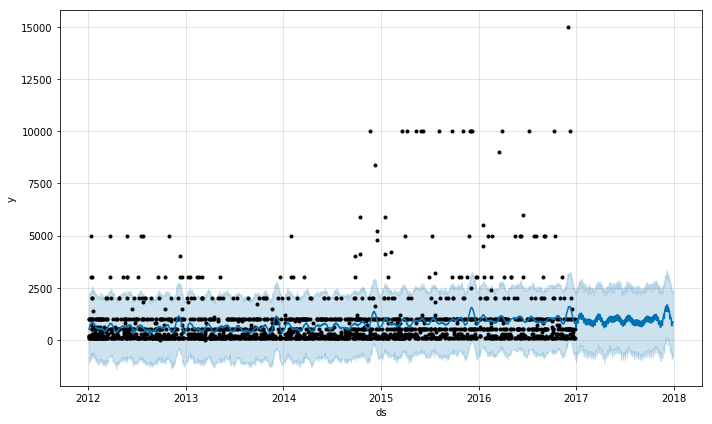

In [23]:
fig1 = m.plot(forecast)

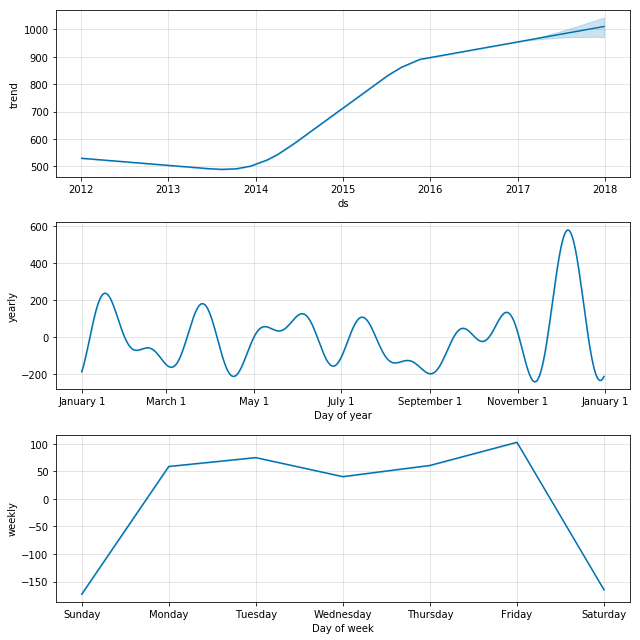

In [24]:
fig2 = m.plot_components(forecast)